In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

In [2]:
# code for synthetic data

# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 200

# Generate synthetic data for each feature
age = np.random.randint(18, 65, size=n_samples,dtype='int')
num_children = np.random.randint(0, 4, size=n_samples,dtype='int')
salary = np.random.randint(30000, 120000, size=n_samples)
distance_km = np.random.uniform(1, 50, size=n_samples)

# Combine features into a numpy array
X = np.column_stack((age, num_children, salary, distance_km))

# Define a function to determine if someone works in the city based on salary and distance
def works_in_city(salary, distance_km):
    if salary >= 50000 and distance_km <= 35:
        return 1
    else:
        return 0

# Apply the function to create the target variable
y = np.array([works_in_city(s, d) for s, d in zip(salary, distance_km)])

# Create a DataFrame to display the data
data = pd.DataFrame(data=X, columns=["Age", "No. of Children", "Salary", "Distance"])
data["Works in City"] = y

# Print the first few rows of the generated dataset
data


,Age,No. of Children,Salary,Distance,Works in City
0,56.0,1.0,73484.0,40.534902,0
1,46.0,2.0,112989.0,49.534752,0
2,32.0,1.0,66212.0,21.218266,1
3,60.0,2.0,73525.0,19.228886,1
4,25.0,0.0,77202.0,39.044235,0
...,...,...,...,...,...
195,49.0,3.0,119084.0,32.036642,1
196,49.0,0.0,74425.0,12.767135,1
197,41.0,3.0,68756.0,4.717303,1
198,58.0,3.0,48888.0,7.315106,0


In [3]:
# convert the first two columns in the data frame to integer

data['Age'] = data['Age'].astype('int')

data['No. of Children'] = data['No. of Children'].astype('int')

In [4]:
# info about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   No. of Children  200 non-null    int64  
 2   Salary           200 non-null    float64
 3   Distance         200 non-null    float64
 4   Works in City    200 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


In [5]:
# check for missing values in the data

data.isna().sum()

Age                0
No. of Children    0
Salary             0
Distance           0
Works in City      0
dtype: int64

In [6]:
# statistical description of the data

data.describe()

,Age,No. of Children,Salary,Distance,Works in City
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,41.570000,1.660000,75666.495000,27.375325,0.465000
std,13.715527,1.162392,26957.328167,14.939186,0.500025
min,18.000000,0.000000,30301.000000,1.531045,0.000000
25%,30.000000,1.000000,50662.500000,15.966972,0.000000
50%,42.000000,2.000000,77974.500000,28.091148,0.000000
75%,54.000000,3.000000,98549.250000,40.843101,1.000000
max,64.000000,3.000000,119912.000000,49.986166,1.000000


In [7]:
# make X and y

X = data.drop(columns=['Works in City'])
y = data['Works in City']

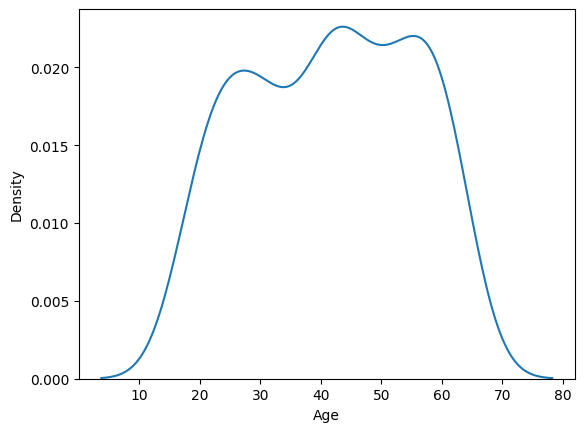

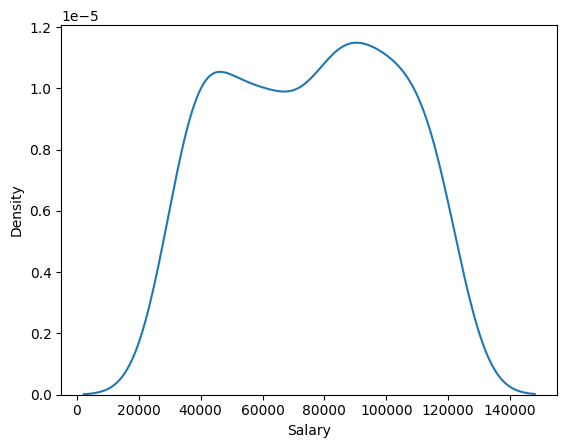

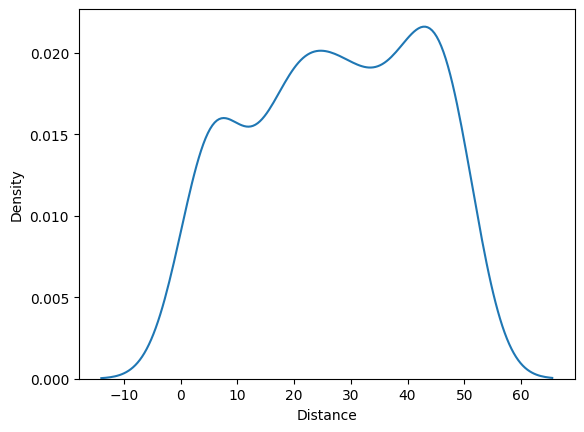

In [8]:
# plot the distribution of the data

for col in X.iloc[:,[0,2,3]]:
    sns.kdeplot(data=X,x=col)
    plt.show()

In [9]:
# distribution of the output column

y.value_counts()

Works in City
0    107
1     93
Name: count, dtype: int64

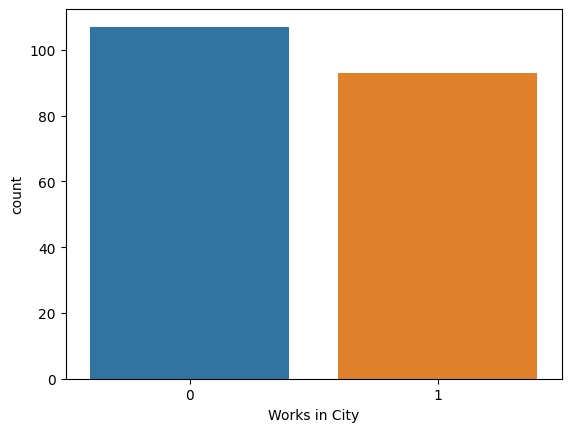

In [10]:
# plot the distribution
sns.countplot(data=data,x='Works in City')
plt.show()

## Train and Predict on models without Feature Scaling

In [11]:
from sklearn.metrics import accuracy_score

# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

print('The size of X_train is',X_train.shape)
print('The size of X_test is',X_test.shape)

The size of X_train is (160, 4)
The size of X_test is (40, 4)


In [12]:
def train_predict(clf):

    score_dict = {}

    for model in clf:
        # fit the model
        model.fit(X_train,y_train)

        # predict on the test data
        y_pred = model.predict(X_test)

        # get the accuracy score
        score = accuracy_score(y_test,y_pred)
        score_dict[str(model.__class__.__name__)] = score

    return score_dict

In [13]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

classifiers = [log_reg,knn,rf]

results = train_predict(classifiers)

# make the results as df

df_dict = {'model':[m for m in results.keys()],
          'score':[s for s in results.values()]}

pd.DataFrame(df_dict)

,model,score
0,LogisticRegression,0.725
1,KNeighborsClassifier,0.700
2,RandomForestClassifier,0.975


- Models based on distances perform poorly when the features are at different scales
- Tree based models are robust in nature. Their performance is not affected by scale of the features.

## Train and Predict on models Feature Scaling

### Standardization

In [14]:
# use standard scaler on data

scaler = StandardScaler()

scaler.set_output(transform='pandas')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# decription of input data after scaling

np.round(X_train_scaled.describe(),2)

,Age,No. of Children,Salary,Distance
count,160.00,160.00,160.00,160.00
mean,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.73,-1.43,-1.72,-1.76
25%,-0.86,-0.56,-0.91,-0.82
50%,0.01,0.31,0.11,0.06
75%,0.91,1.18,0.82,0.92
max,1.60,1.18,1.62,1.50


**We can clearly observe that after scaling the mean of the input columns is 0 and the std is 1**

In [16]:
def train_predict_scaled(clf):

    score_dict = {}

    for model in clf:
        # fit the model
        model.fit(X_train_scaled,y_train)

        # predict on the test data
        y_pred = model.predict(X_test_scaled)

        # get the accuracy score
        score = accuracy_score(y_test,y_pred)
        score_dict[str(model.__class__.__name__)] = score

    return score_dict

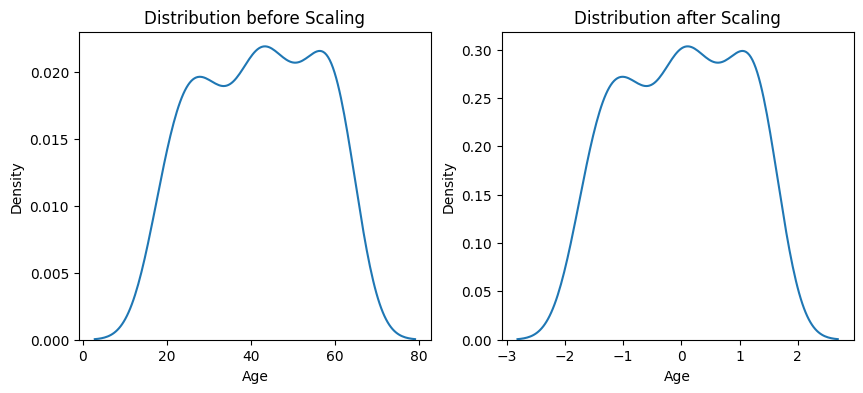

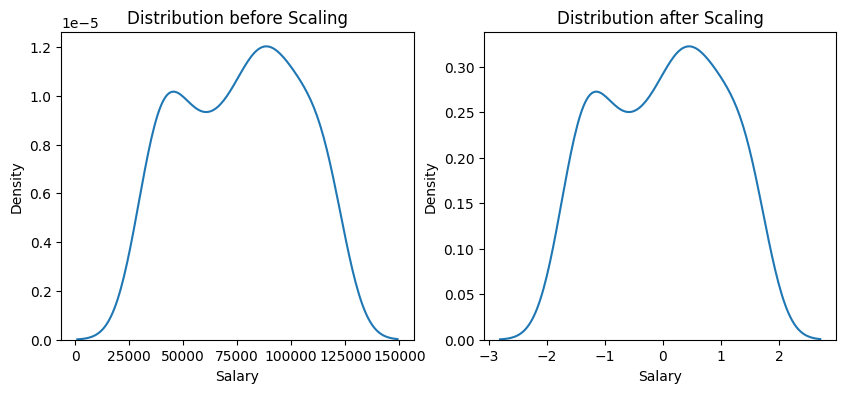

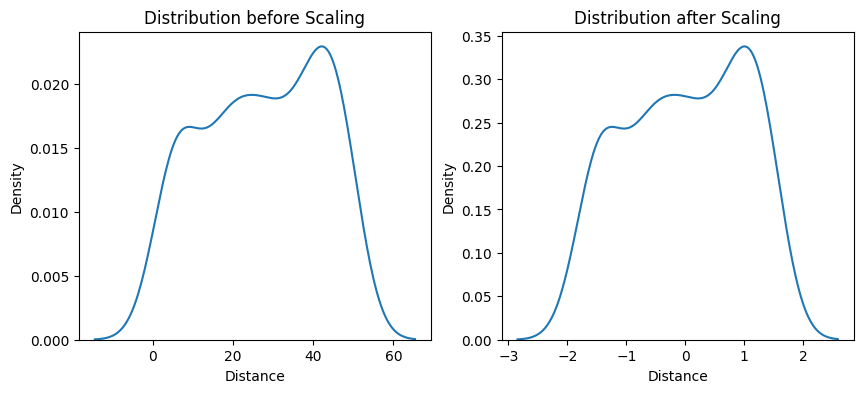

In [17]:
# distribution of columns before and after scaling
col_index = [0,2,3]

for i in range(3):
    fig = plt.figure(figsize=(10,4))
    # plot the first subplot
    plt.subplot(1,2,1)
    sns.kdeplot(data=X_train,x=X_train.iloc[:,col_index[i]])
    plt.title('Distribution before Scaling')


    # plot the second subplot
    plt.subplot(1,2,2)
    sns.kdeplot(data=X_train_scaled,x=X_train_scaled.iloc[:,col_index[i]])
    plt.title('Distribution after Scaling')
    plt.tight_layout
    plt.show()


In [18]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

classifiers = [log_reg,knn,rf]

results_scaled = train_predict_scaled(classifiers)

# make the results as df

df_dict_scaled = {'model':[m for m in results_scaled.keys()],
          'score':[s for s in results_scaled.values()]}
print('Model performance before scaling')
display(pd.DataFrame(df_dict))

print('-'*80)

print('Model performance after scaling')
display(pd.DataFrame(df_dict_scaled))

Model performance before scaling


,model,score
0,LogisticRegression,0.725
1,KNeighborsClassifier,0.700
2,RandomForestClassifier,0.975


--------------------------------------------------------------------------------
Model performance after scaling


,model,score
0,LogisticRegression,0.725
1,KNeighborsClassifier,0.850
2,RandomForestClassifier,0.975


### Normalization

In [19]:
# use min max scaler on data

scaler_norm = MinMaxScaler()

scaler_norm.set_output(transform='pandas')

X_train_scaled = scaler_norm.fit_transform(X_train)
X_test_scaled = scaler_norm.transform(X_test)

In [20]:
# statistical description of the input columns after min max scaling

X_train_scaled.describe()

,Age,No. of Children,Salary,Distance
count,160.000000,160.000000,160.000000,160.000000
mean,0.519429,0.547917,0.514237,0.540183
std,0.301676,0.383713,0.300316,0.308518
min,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.333333,0.242389,0.287454
50%,0.521739,0.666667,0.547935,0.557291
75%,0.793478,1.000000,0.759745,0.821875
max,1.000000,1.000000,1.000000,1.000000


- The minimum value of the columns has been scaled to 0 and the maximum value to 1

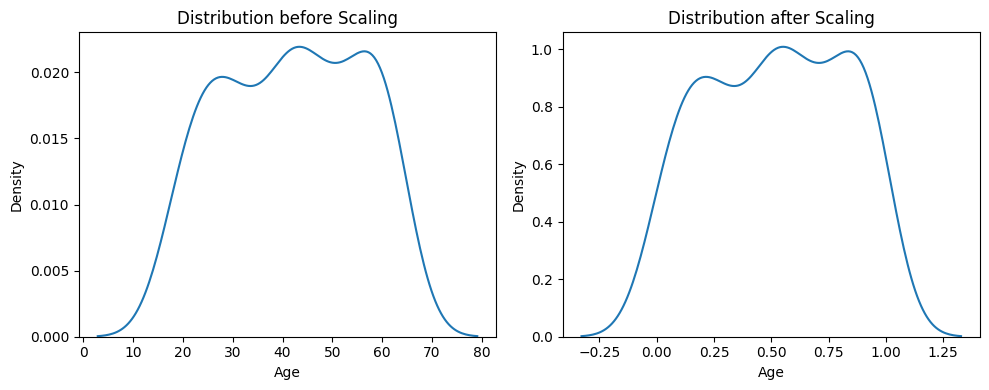

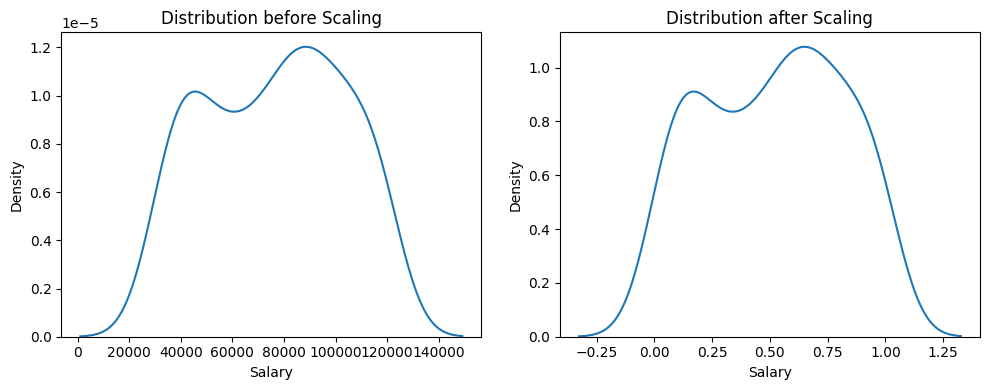

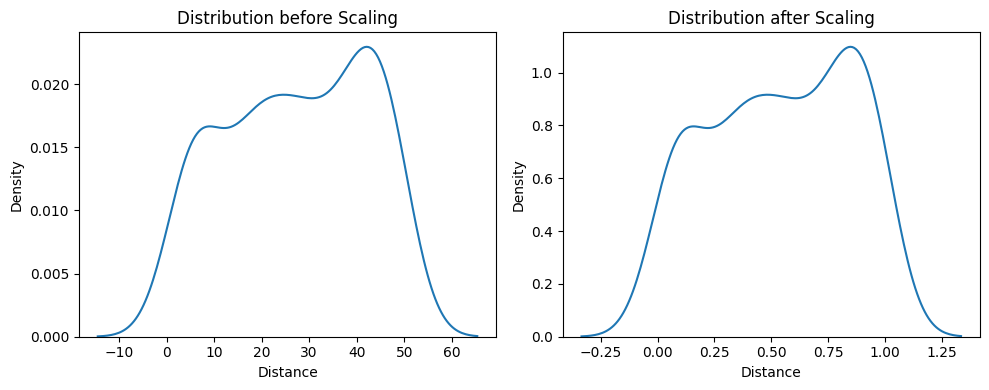

In [21]:
# distribution of columns before and after scaling
col_index = [0,2,3]

for i in range(3):
    fig = plt.figure(figsize=(10,4))
    # plot the first subplot
    plt.subplot(1,2,1)
    sns.kdeplot(data=X_train,x=X_train.iloc[:,col_index[i]])
    plt.title('Distribution before Scaling')


    # plot the second subplot
    plt.subplot(1,2,2)
    sns.kdeplot(data=X_train_scaled,x=X_train_scaled.iloc[:,col_index[i]])
    plt.title('Distribution after Scaling')
    plt.tight_layout()
    plt.show()


In [22]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

classifiers = [log_reg,knn,rf]

results_scaled = train_predict_scaled(classifiers)

# make the results as df

df_dict_scaled = {'model':[m for m in results_scaled.keys()],
          'score':[s for s in results_scaled.values()]}
print('Model performance before scaling')
display(pd.DataFrame(df_dict))

print('-'*80)

print('Model performance after scaling')
display(pd.DataFrame(df_dict_scaled))

Model performance before scaling


,model,score
0,LogisticRegression,0.725
1,KNeighborsClassifier,0.700
2,RandomForestClassifier,0.975


--------------------------------------------------------------------------------
Model performance after scaling


,model,score
0,LogisticRegression,0.725
1,KNeighborsClassifier,0.850
2,RandomForestClassifier,0.975


**We can see that the scaling does have an impact on the performance of the models (especially in KNN)**

But we cannot compare the two techniques as they are giving similar results (**In this case**)

## Effect of Outliers on scaling

In [23]:
# add some outliers to the data

X.columns

Index(['Age', 'No. of Children', 'Salary', 'Distance'], dtype='object')

In [24]:
dict_outliers = {'Age':[100,2,5,120],
'Salary':[200,1000000,12144,60000000],
'Distance':[17,32,12,300],
'No. of Children':[2,3,1,10],
'Works in City':[0,1,1,0]}

df_outliers = pd.DataFrame(dict_outliers)

df_outliers

,Age,Salary,Distance,No. of Children,Works in City
0,100,200,17,2,0
1,2,1000000,32,3,1
2,5,12144,12,1,1
3,120,60000000,300,10,0


In [25]:
df = pd.concat([data,df_outliers])

In [26]:
# make X and y

X = df.drop(columns=df.columns[-1])
y = df[df.columns[-1]]

In [27]:
# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

print('The size of X_train is',X_train.shape)
print('The size of X_test is',X_test.shape)

The size of X_train is (163, 4)
The size of X_test is (41, 4)


In [28]:
def train_predict(clf):

    score_dict = {}

    for model in clf:
        # fit the model
        model.fit(X_train,y_train)

        # predict on the test data
        y_pred = model.predict(X_test)

        # get the accuracy score
        score = accuracy_score(y_test,y_pred)
        score_dict[str(model.__class__.__name__)] = score

    return score_dict

In [29]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

classifiers = [log_reg,knn,rf]

results = train_predict(classifiers)

# make the results as df

df_dict = {'model':[m for m in results.keys()],
          'score':[s for s in results.values()]}

pd.DataFrame(df_dict)

,model,score
0,LogisticRegression,0.804878
1,KNeighborsClassifier,0.585366
2,RandomForestClassifier,1.000000


### Standardization

In [30]:
# use standard scaler on data

scaler = StandardScaler()

scaler.set_output(transform='pandas')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# decription of input data after scaling

np.round(X_train_scaled.describe(),2)

,Age,No. of Children,Salary,Distance
count,163.00,163.00,163.00,163.00
mean,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-2.69,-1.42,-1.02,-1.70
25%,-0.82,-0.55,-0.39,-0.84
50%,0.05,0.33,-0.05,0.02
75%,0.91,1.20,0.23,0.87
max,3.85,1.20,11.89,1.61


In [32]:
def train_predict_scaled(clf):

    score_dict = {}

    for model in clf:
        # fit the model
        model.fit(X_train_scaled,y_train)

        # predict on the test data
        y_pred = model.predict(X_test_scaled)

        # get the accuracy score
        score = accuracy_score(y_test,y_pred)
        score_dict[str(model.__class__.__name__)] = score

    return score_dict

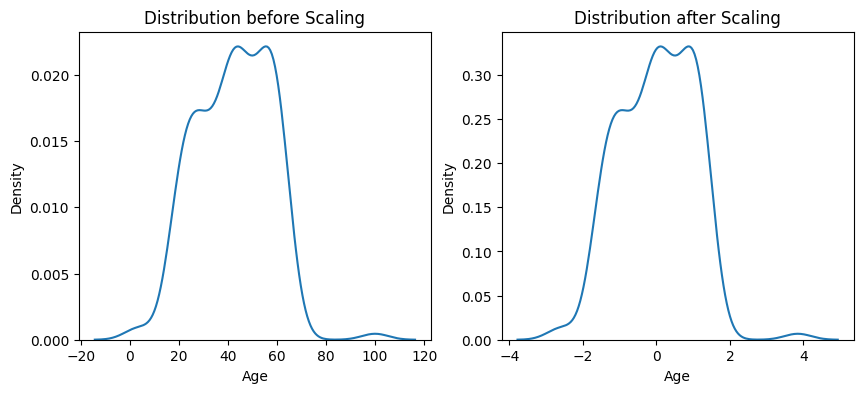

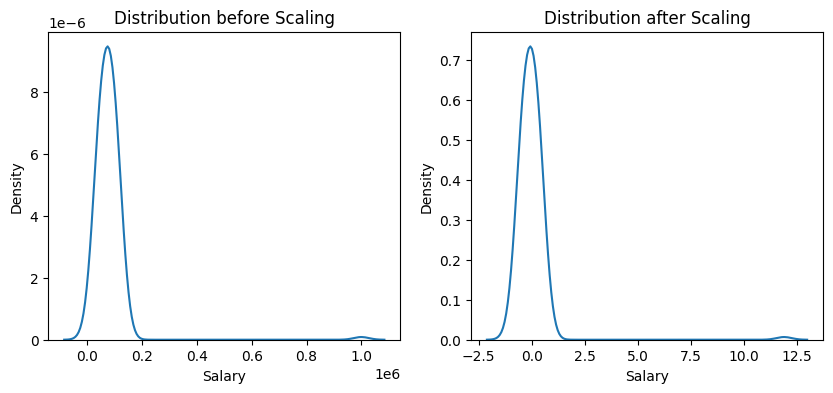

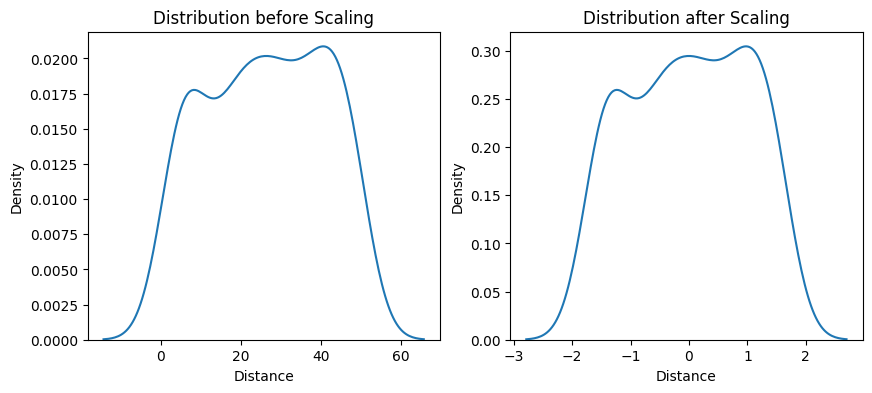

In [33]:
# distribution of columns before and after scaling
col_index = [0,2,3]

for i in range(3):
    fig = plt.figure(figsize=(10,4))
    # plot the first subplot
    plt.subplot(1,2,1)
    sns.kdeplot(data=X_train,x=X_train.iloc[:,col_index[i]])
    plt.title('Distribution before Scaling')


    # plot the second subplot
    plt.subplot(1,2,2)
    sns.kdeplot(data=X_train_scaled,x=X_train_scaled.iloc[:,col_index[i]])
    plt.title('Distribution after Scaling')
    plt.tight_layout
    plt.show()


In [34]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

classifiers = [log_reg,knn,rf]

results_scaled = train_predict_scaled(classifiers)

# make the results as df

df_dict_scaled = {'model':[m for m in results_scaled.keys()],
          'score':[s for s in results_scaled.values()]}
print('Model performance before scaling')
display(pd.DataFrame(df_dict))

print('-'*80)

print('Model performance after scaling')
display(pd.DataFrame(df_dict_scaled))

Model performance before scaling


,model,score
0,LogisticRegression,0.804878
1,KNeighborsClassifier,0.585366
2,RandomForestClassifier,1.000000


--------------------------------------------------------------------------------
Model performance after scaling


,model,score
0,LogisticRegression,0.804878
1,KNeighborsClassifier,0.878049
2,RandomForestClassifier,1.000000


### Normalization

In [35]:
# use min max scaler on data

scaler_norm = MinMaxScaler()

scaler_norm.set_output(transform='pandas')

X_train_scaled = scaler_norm.fit_transform(X_train)
X_test_scaled = scaler_norm.transform(X_test)

In [36]:
# statistical description of the input columns after min max scaling

X_train_scaled.describe()

,Age,No. of Children,Salary,Distance
count,163.000000,163.000000,163.000000,163.000000
mean,0.411419,0.541922,0.079279,0.513254
std,0.153509,0.383268,0.077698,0.303191
min,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.333333,0.048849,0.258661
50%,0.418367,0.666667,0.075051,0.519639
75%,0.551020,1.000000,0.096735,0.776976
max,1.000000,1.000000,1.000000,1.000000


- The minimum value of the columns has been scaled to 0 and the maximum value to 1

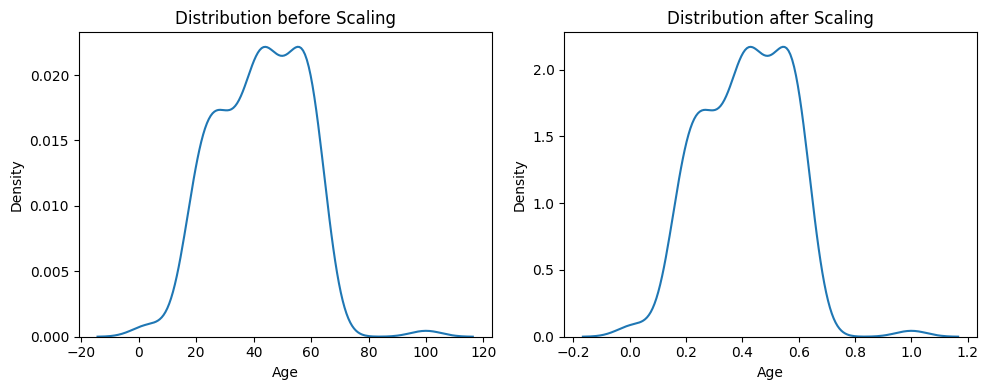

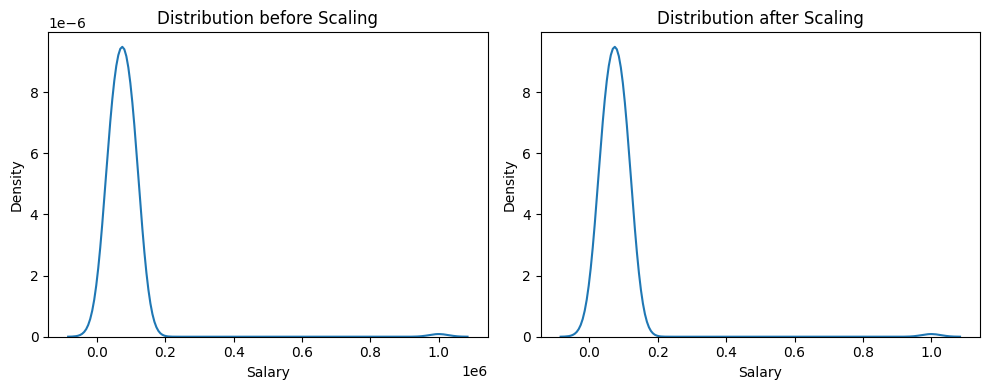

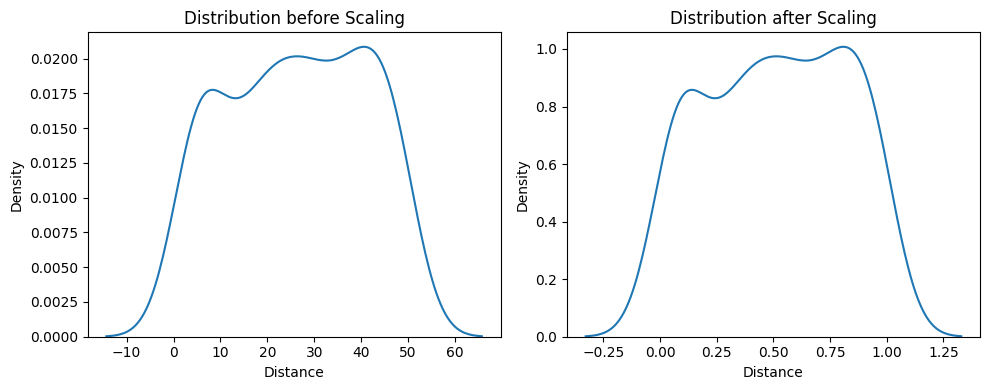

In [37]:
# distribution of columns before and after scaling
col_index = [0,2,3]

for i in range(3):
    fig = plt.figure(figsize=(10,4))
    # plot the first subplot
    plt.subplot(1,2,1)
    sns.kdeplot(data=X_train,x=X_train.iloc[:,col_index[i]])
    plt.title('Distribution before Scaling')


    # plot the second subplot
    plt.subplot(1,2,2)
    sns.kdeplot(data=X_train_scaled,x=X_train_scaled.iloc[:,col_index[i]])
    plt.title('Distribution after Scaling')
    plt.tight_layout()
    plt.show()


In [38]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

classifiers = [log_reg,knn,rf]

results_scaled = train_predict_scaled(classifiers)

# make the results as df

df_dict_scaled = {'model':[m for m in results_scaled.keys()],
          'score':[s for s in results_scaled.values()]}
print('Model performance before scaling')
display(pd.DataFrame(df_dict))

print('-'*80)

print('Model performance after scaling')
display(pd.DataFrame(df_dict_scaled))

Model performance before scaling


,model,score
0,LogisticRegression,0.804878
1,KNeighborsClassifier,0.585366
2,RandomForestClassifier,1.000000


--------------------------------------------------------------------------------
Model performance after scaling


,model,score
0,LogisticRegression,0.658537
1,KNeighborsClassifier,0.780488
2,RandomForestClassifier,1.000000


**Min Max Scaling is not that robust to outliers as compared to Standard scaler**

### Robust Scaling

In [39]:
# use robust scaler on data

scaler = RobustScaler()

scaler.set_output(transform='pandas')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

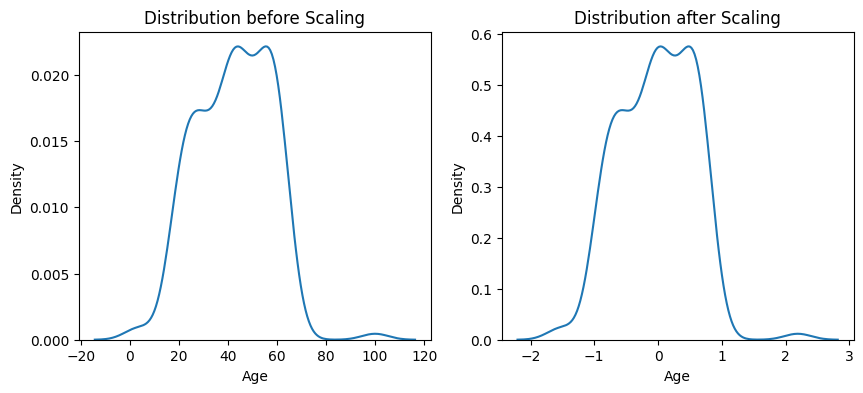

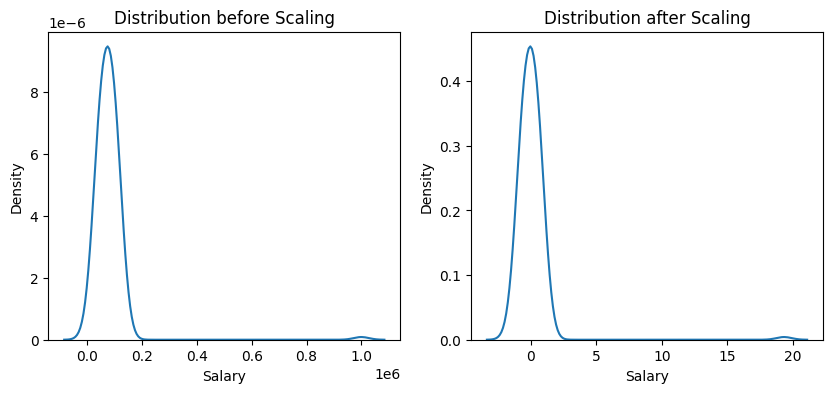

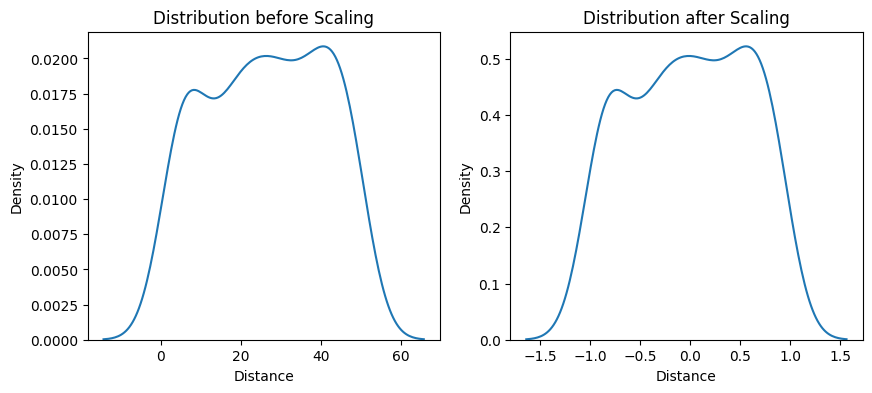

In [40]:
# distribution of columns before and after scaling
col_index = [0,2,3]

for i in range(3):
    fig = plt.figure(figsize=(10,4))
    # plot the first subplot
    plt.subplot(1,2,1)
    sns.kdeplot(data=X_train,x=X_train.iloc[:,col_index[i]])
    plt.title('Distribution before Scaling')


    # plot the second subplot
    plt.subplot(1,2,2)
    sns.kdeplot(data=X_train_scaled,x=X_train_scaled.iloc[:,col_index[i]])
    plt.title('Distribution after Scaling')
    plt.tight_layout
    plt.show()


In [41]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

classifiers = [log_reg,knn,rf]

results_scaled = train_predict_scaled(classifiers)

# make the results as df

df_dict_scaled = {'model':[m for m in results_scaled.keys()],
          'score':[s for s in results_scaled.values()]}
print('Model performance before scaling')
display(pd.DataFrame(df_dict))

print('-'*80)

print('Model performance after scaling')
display(pd.DataFrame(df_dict_scaled))

Model performance before scaling


,model,score
0,LogisticRegression,0.804878
1,KNeighborsClassifier,0.585366
2,RandomForestClassifier,1.000000


--------------------------------------------------------------------------------
Model performance after scaling


,model,score
0,LogisticRegression,0.804878
1,KNeighborsClassifier,0.926829
2,RandomForestClassifier,1.000000


**Indeed the performance of Robust Scaler is far better compared to other scaling techniques on the data containing outliers**